In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import os

In [2]:
def createM(filename):
    data = pd.read_csv(filename,header=None,sep=' ')
    data.columns = ['n1', 'n2', 'timestamp']
    M = nx.from_pandas_dataframe(data,'n1','n2',edge_attr='timestamp', create_using=nx.MultiGraph())
    return M

In [3]:
# create weighted graph from Multigraph
def Mg2Wg(M):
    G = nx.Graph()
    for u,v,data in M.edges_iter(data=True):
        if G.has_edge(u,v):
            G[u][v]['weight'] += 1
        else:
            G.add_edge(u, v, weight=1)
    return G


In [4]:
# 获取文件夹内所有文件名  
def file_name(file_dir):   
    L=[]   
    for root, dirs, files in os.walk(file_dir):
        for file in files: 
            if file.startswith('2013'): 
                L.append(file) 
    return L

In [13]:
df_cluster = pd.DataFrame()
df_meandegree = pd.DataFrame()
df_assort = pd.DataFrame()
files = file_name('./data')

In [14]:
for filename in files:
    date,model = filename.split('_',1)
    model = model.split('.')[0]

    M = createM('./data/' + filename)
    G = Mg2Wg(M)

    # 聚类系数
    df_cluster.loc[date,model] = nx.average_clustering(G)
    
    # 平均度
    df_meandegree.loc[date,model] = np.mean(nx.degree(G).values())

    # 匹配系数
    df_assort.loc[date,model] = nx.degree_assortativity_coefficient(G)

In [18]:
df_cluster

,origin,0k,1k,time_swap,time_randomcreat,timeweight_swap,sametimeweight_swap,time_randomswap,SameMode_day,SameMode_week,SameMode_month,time_reverse
20131203,0.418355,0.064754,0.073023,0.418355,0.418355,0.418355,0.418355,0.418355,0.418355,0.418355,0.418355,0.418355
20131204,0.430972,0.057857,0.061901,0.430972,0.430972,0.430972,0.430972,0.430972,0.430972,0.430972,0.430972,0.430972
20131205,0.384657,0.062884,0.075692,0.384657,0.384657,0.384657,0.384657,0.384657,0.384657,0.384657,0.384657,0.384657
20131206,0.434125,0.062987,0.067295,0.434125,0.434125,0.434125,0.434125,0.434125,0.434125,0.434125,0.434125,0.434125
20131202,0.401081,0.053101,0.066162,0.401081,0.401081,0.401081,0.401081,0.401081,0.401081,0.401081,0.401081,0.401081


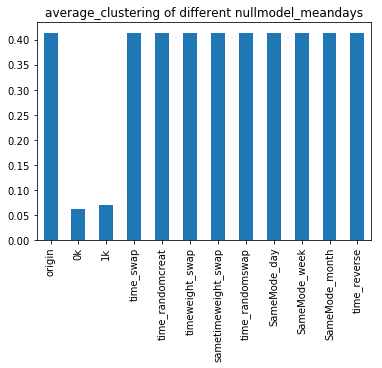

In [15]:
df_cluster.mean().plot(kind='bar',rot=90)
plt.title('average_clustering of different nullmodel_meandays')

In [19]:
df_meandegree

,origin,0k,1k,time_swap,time_randomcreat,timeweight_swap,sametimeweight_swap,time_randomswap,SameMode_day,SameMode_week,SameMode_month,time_reverse
20131203,16.600000,16.600000,16.600000,16.600000,16.600000,16.600000,16.600000,16.600000,16.600000,16.600000,16.600000,16.600000
20131204,14.264026,14.264026,14.264026,14.264026,14.264026,14.264026,14.264026,14.264026,14.264026,14.264026,14.264026,14.264026
20131205,14.657627,14.657627,14.657627,14.657627,14.657627,14.657627,14.657627,14.657627,14.657627,14.657627,14.657627,14.657627
20131206,13.879599,13.926174,13.879599,13.879599,13.879599,13.879599,13.879599,13.879599,13.879599,13.879599,13.879599,13.879599
20131202,14.371795,14.371795,14.371795,14.371795,14.371795,14.371795,14.371795,14.371795,14.371795,14.371795,14.371795,14.371795


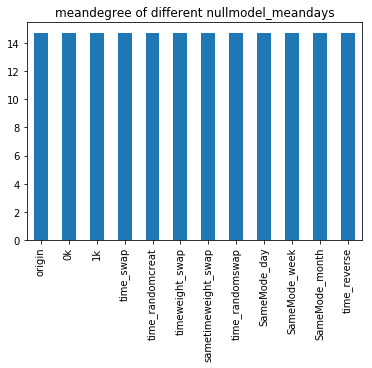

In [16]:
df_meandegree.mean().plot(kind='bar',rot=90)
plt.title('meandegree of different nullmodel_meandays')

In [20]:
df_assort

,origin,0k,1k,time_swap,time_randomcreat,timeweight_swap,sametimeweight_swap,time_randomswap,SameMode_day,SameMode_week,SameMode_month,time_reverse
20131203,0.119599,0.009629,0.012083,0.119599,0.119599,0.119599,0.119599,0.119599,0.119599,0.119599,0.119599,0.119599
20131204,0.082220,0.013808,-0.064561,0.082220,0.082220,0.082220,0.082220,0.082220,0.082220,0.082220,0.082220,0.082220
20131205,0.075117,0.020164,0.007381,0.075117,0.075117,0.075117,0.075117,0.075117,0.075117,0.075117,0.075117,0.075117
20131206,0.193378,0.078745,0.000608,0.193378,0.193378,0.193378,0.193378,0.193378,0.193378,0.193378,0.193378,0.193378
20131202,0.091914,0.025641,-0.030096,0.091914,0.091914,0.091914,0.091914,0.091914,0.091914,0.091914,0.091914,0.091914


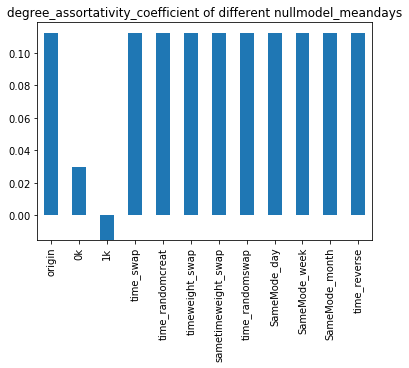

In [17]:
df_assort.mean().plot(kind='bar',rot=90)
plt.title('degree_assortativity_coefficient of different nullmodel_meandays')